In [113]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import math
import sys
sys.path.insert(0, './code')
from CastCol import cast_columns

gzip = True
if gzip:
    import gzip
    open = gzip.open

In [114]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [115]:
def ip_to_user(ip, group_size=5, starting=5):
    isp = int(int(ip.split(".")[-2]))
    node_number = int(ip.split(".")[-1]) - starting - isp
    user = node_number % group_size
    group = math.floor(node_number / group_size)
    return '/tordata/config/group_' + str(group) + "_user_" + str(user)

In [116]:
def limit_range(ts1, ts2):
    range = min(ts2.index.values), max(ts2.index.values)
    ts1 = ts1.loc[(ts1.index >= range[0]) & (ts1.index <= range[1])]
    return ts1

In [117]:
def load(data_file):
    with open(data_file, 'rb') as file:
        traffic = pickle.load(file)
        msgs = pickle.load(file)
    return traffic, msgs

def select(data, ip, feature, limit=False):
    traffic = data[0][ip][feature]
    msgs = data[1][ip_to_user(ip)]["count"]
    if limit:
        traffic = limit_range(traffic, msgs)
    return traffic, msgs

from functools import reduce
def selectAll(data, feature, limit=False):
    traffic = reduce(lambda df1, df2: df1.add(df2, fill_value=0), [d.drop('frame.time', axis=1) for d in data[0].values()])
    return traffic[feature]

def plot(ts,):
    fig, ax = plt.subplots(figsize=(8, 6))
    for t in ts:
        ax.plot(t[0], label=t[1])
    plt.legend()

In [146]:
data_file = "code/pkl/dns_new_scale1000_tda__ts.pkl.gz"
ip = "102.0.0.15"
feature = "count_ISP1"

dot = load(data_file)
dot_traffic, dot_user = select(dot, ip, feature, limit=False)

In [147]:
a = dot[0][ip].drop('frame.time', axis=1)
massages_a = a['count_Service']

In [148]:
all_traffic = selectAll(dot, "count", limit=False)
all_traffic_isp = selectAll(dot, "count_ISPAll", limit=False)
all_traffic_isp1 = selectAll(dot, "count_ISP1", limit=False)

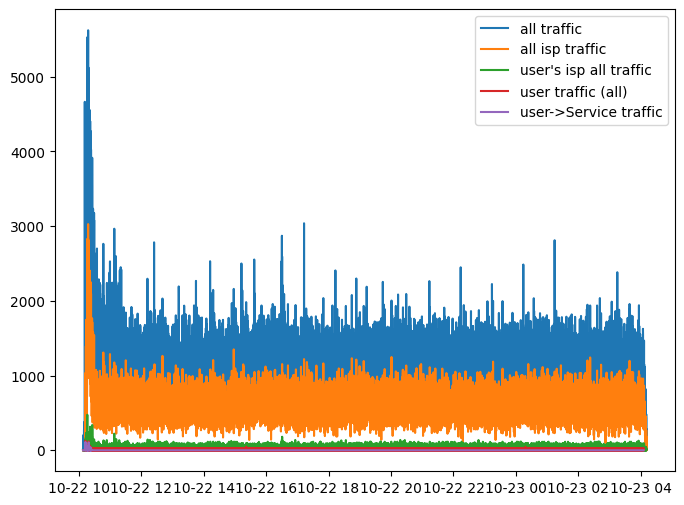

In [149]:
plot([(all_traffic, "all traffic"), (all_traffic_isp, "all isp traffic"), (all_traffic_isp1, "user's isp all traffic"), (dot_traffic, "user traffic (all)"), (massages_a, "user->Service traffic")])

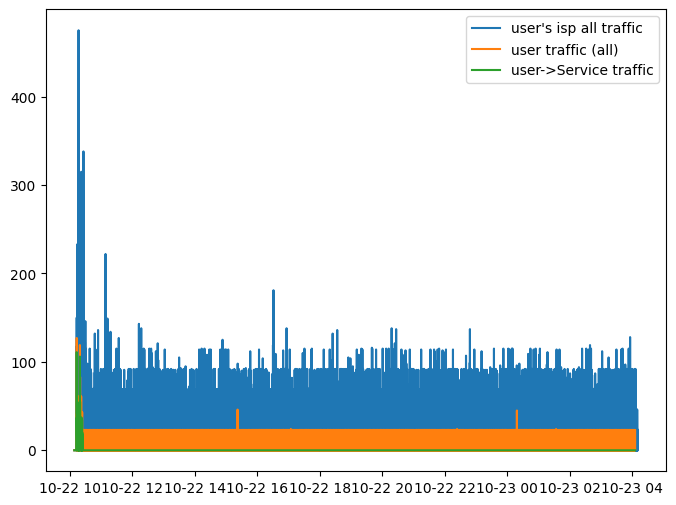

In [150]:
plot([(all_traffic_isp1, "user's isp all traffic"), (dot_traffic, "user traffic (all)"), (massages_a, "user->Service traffic")])

In [151]:
ratio_all = (massages_a/all_traffic).fillna(0)
ratio_user = (dot_traffic/all_traffic).fillna(0)

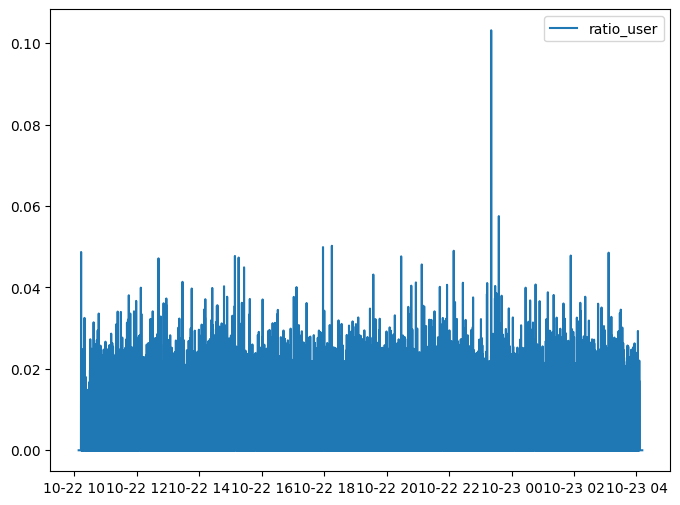

In [152]:
plot([(ratio_user, "ratio_user")])

In [156]:
dot_traffic

frame.time
2023-10-22 10:08:26.349     0.0
2023-10-22 10:08:29.682     0.0
2023-10-22 10:08:33.015     0.0
2023-10-22 10:08:36.348     0.0
2023-10-22 10:08:39.681     0.0
                           ... 
2023-10-23 04:05:09.888     0.0
2023-10-23 04:05:13.221     0.0
2023-10-23 04:05:16.554     0.0
2023-10-23 04:05:19.887     1.0
2023-10-23 04:05:23.220    22.0
Name: count_ISP1, Length: 19388, dtype: float64

In [154]:
all_traffic

frame.time
2023-10-22 10:08:26.349     20.0
2023-10-22 10:08:29.682     21.0
2023-10-22 10:08:33.015      0.0
2023-10-22 10:08:36.348     92.0
2023-10-22 10:08:39.681      0.0
                           ...  
2023-10-23 04:10:56.520    213.0
2023-10-23 04:10:59.853     70.0
2023-10-23 04:11:03.186      3.0
2023-10-23 04:11:06.519     67.0
2023-10-23 04:11:09.852    137.0
Name: count, Length: 19492, dtype: float64

In [155]:
(dot_traffic/all_traffic).dropna()

frame.time
2023-10-22 10:08:26.349    0.000000
2023-10-22 10:08:29.682    0.000000
2023-10-22 10:08:36.348    0.000000
2023-10-22 10:08:43.014    0.000000
2023-10-22 10:08:46.347    0.000000
                             ...   
2023-10-23 04:05:09.888    0.000000
2023-10-23 04:05:13.221    0.000000
2023-10-23 04:05:16.554    0.000000
2023-10-23 04:05:19.887    0.000900
2023-10-23 04:05:23.220    0.022022
Length: 19370, dtype: float64